# Анализ данных и моделирование при помощи модели Gradient Boosting
**Описание:** Проект включает в себя предварительную обработку данных, создание новых признаков, очистку от выбросов и корреляционный анализ для улучшения качества данных. Основная цель — спрогнозировать переменную `Гармония Бессмертия` с использованием модели градиентного бустинга.

In [ ]:
# Для выполнения анализа и построения модели потребуются следующие библиотеки:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

# 1: Загрузка, обработка и подготовка данных

In [ ]:
data = pd.read_csv('/content/data.csv')
data

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.95,2.087,1.394603,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,Исток не вернул выдох,2.512,1.394603,13.109,Древний Ветер развеялся,32.671,0.647,1.00,1.000
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,1.394603,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,Исток не вернул выдох,3.594,1.394603,18.293,Древний Ветер развеялся,58.064,1.149,1.00,1.000


In [ ]:
# Преобразуем все нечисловые значения во всех признаках в NaN
for column in data.columns:
    # Проверяем, если столбец содержит строковые данные
    if data[column].dtype == 'object':
        # Заменяем все значения, которые нельзя привести к числу, на NaN
        data[column] = pd.to_numeric(data_reduced[column], errors='coerce')
data

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,NaN,1.096,1.394603,5.947,NaN,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,NaN,1.389,1.394603,7.574,NaN,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,NaN,1.658,1.394603,9.007,NaN,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.950,2.087,1.394603,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,NaN,2.512,1.394603,13.109,NaN,32.671,0.647,1.00,1.000
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,1.394603,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,NaN,3.594,1.394603,18.293,NaN,58.064,1.149,1.00,1.000


In [ ]:
# Заполнение медианой для каждого столбца
data = data.fillna(data_reduced.median())
data

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,636.963,1.096,1.394603,5.947,1.026,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,636.963,1.389,1.394603,7.574,1.026,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,636.963,1.658,1.394603,9.007,1.026,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.950,2.087,1.394603,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,636.963,2.512,1.394603,13.109,1.026,32.671,0.647,1.00,1.000
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,1.394603,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,636.963,3.594,1.394603,18.293,1.026,58.064,1.149,1.00,1.000


# 2: Очистка данных от выбросов
Для числовых признаков устанавливаем границы выбросов с использованием межквартильного размаха (IQR), определяем границы выбросов и фильтруем данные для исключения аномальных значений

In [ ]:
# Копируем исходный датасет для обработки
data_cleaned = data.copy()

# Создаем условие для отбора значений в пределах границ для каждого столбца
for column in data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    # Рассчитываем первый и третий квартили
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # Определяем границы для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Фильтруем значения, выходящие за пределы границ
    data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]
    data = data_cleaned
# Просмотр очищенного от выбросов датасета
data

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,636.963,1.096,1.394603,5.947,1.026,7.137,0.082,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,636.963,1.389,1.394603,7.574,1.026,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,636.963,1.658,1.394603,9.007,1.026,18.109,0.358,0.95,0.975
6,7.148,10.80324,38982.180,280.448510,9132.429,332.077,332.077,854.747,736,636.963,2.963,1.394603,15.679,1.026,45.881,0.908,0.95,0.975
7,8.206,12.34656,50996.808,323.328632,9318.562,437.989,437.989,952.122,736,636.963,3.576,1.394603,18.632,1.026,62.440,1.236,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11927,3.144,4.62996,8375.659,145.218759,7063.239,60.319,60.319,563.854,736,636.963,1.391,1.394603,7.416,1.026,11.419,0.226,1.00,1.000
11928,4.161,6.17328,14718.321,162.048899,7729.639,113.743,113.743,617.242,736,636.963,1.663,1.394603,8.830,1.026,16.151,0.320,1.00,1.000
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,636.963,2.512,1.394603,13.109,1.026,32.671,0.647,1.00,1.000
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,636.963,3.594,1.394603,18.293,1.026,58.064,1.149,1.00,1.000


# 3: Создание новых признаков
Создаем дополнительные признаки, которые могут улучшить качество модели:

In [ ]:
# 1. Общая мощность потоков - сумма "Сила Левого Потока" и "Сила Правого Потока"
data['Общая мощность потоков'] = data['Сила Левого Потока'] + data['Сила Правого Потока']

# 2. Суммарная мощность всех потоков - "Сила Левого Потока" + "Сила Правого Потока" + "Приток Силы Потока"
data['Суммарная мощность всех потоков'] = data['Сила Левого Потока'] + data['Сила Правого Потока'] + data['Приток Силы Потока']

# 3. Общая сила ядра - "Ритм магического ядра" * "Приток Силы Потока"
data['Общая сила ядра'] = data['Ритм магического ядра'] * data['Приток Силы Потока']

# 4. Общее давление на выходе - "Приток давления Выдоха Истока" + "Давление выдоха Истока"
data['Общее давление на выходе'] = data['Приток давления Выдоха Истока'] + data['Давление выдоха Истока']

# 5. Магическая производительность - "Скорость перехода через портал" / "Эмульсия Истока"
data['Магическая производительность'] = data['Скорость перехода через портал'] / data['Эмульсия Истока']

# 6. Эффективность ядра - Общая сила ядра / "Эмульсия Истока"
data['Эффективность ядра'] = data['Общая сила ядра'] / data['Эмульсия Истока']

# 7. Магическая мощность - "Эмульсия Истока" * Общее давление на выходе * ("Пламя Стихий" - "Температура вдоха Истока")
data['Магическая мощность'] = data['Эмульсия Истока'] * data['Общее давление на выходе'] * (data['Пламя Стихий'] - data['Температура вдоха Истока'])

# 8. Степень износа магических источников - "Дыхание Истока" / "Гармония Бессмертия"
data['Степень износа магических источников'] = data['Дыхание Истока'] / data['Гармония Бессмертия']

# 9. Абсолютное значение расхождений стабильности - |"Дыхание Истока" - "Гармония Бессмертия"|
data['Абсолютное расхождение стабильности'] = abs(data['Дыхание Истока'] - data['Гармония Бессмертия'])

# 10. Баланс угасания - (|Дыхание Истока - Гармония Бессмертия|) / "Скорость перехода через портал"
data['Баланс угасания'] = abs(data['Дыхание Истока'] - data['Гармония Бессмертия']) / data['Скорость перехода через портал']

data

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,...,Общая мощность потоков,Суммарная мощность всех потоков,Общая сила ядра,Общее давление на выходе,Магическая производительность,Эффективность ядра,Магическая мощность,Степень износа магических источников,Абсолютное расхождение стабильности,Баланс угасания
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,636.963,...,15.168,305.132,4.097718e+04,7.043,18.820976,4.997217e+05,-157.083607,0.974359,0.025,0.016199
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,636.963,...,120.716,8499.945,1.216839e+06,8.963,17.876293,4.698219e+06,-301.779567,0.974359,0.025,0.005400
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,636.963,...,227.548,14951.943,2.386091e+06,10.665,17.243799,6.665057e+06,-284.556939,0.974359,0.025,0.004050
6,7.148,10.80324,38982.180,280.448510,9132.429,332.077,332.077,854.747,736,636.963,...,664.154,39646.334,1.093249e+07,18.642,11.897841,1.204019e+07,2010.022869,0.974359,0.025,0.002314
7,8.206,12.34656,50996.808,323.328632,9318.562,437.989,437.989,952.122,736,636.963,...,875.978,51872.786,1.648873e+07,22.208,9.989126,1.334039e+07,5932.351797,0.974359,0.025,0.002025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11927,3.144,4.62996,8375.659,145.218759,7063.239,60.319,60.319,563.854,736,636.963,...,120.638,8496.297,1.216303e+06,8.807,20.486549,5.381871e+06,-342.636300,1.000000,0.000,0.000000
11928,4.161,6.17328,14718.321,162.048899,7729.639,113.743,113.743,617.242,736,636.963,...,227.486,14945.807,2.385088e+06,10.493,19.291500,7.453399e+06,-398.760862,1.000000,0.000,0.000000
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,636.963,...,491.908,30255.121,7.189654e+06,15.621,14.312087,1.111229e+07,115.267906,1.000000,0.000,0.000000
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,636.963,...,876.048,51868.627,1.648668e+07,21.887,10.745483,1.434872e+07,3946.878442,1.000000,0.000,0.000000


# 4: Корреляционный анализ
Выявление связи между явлениями

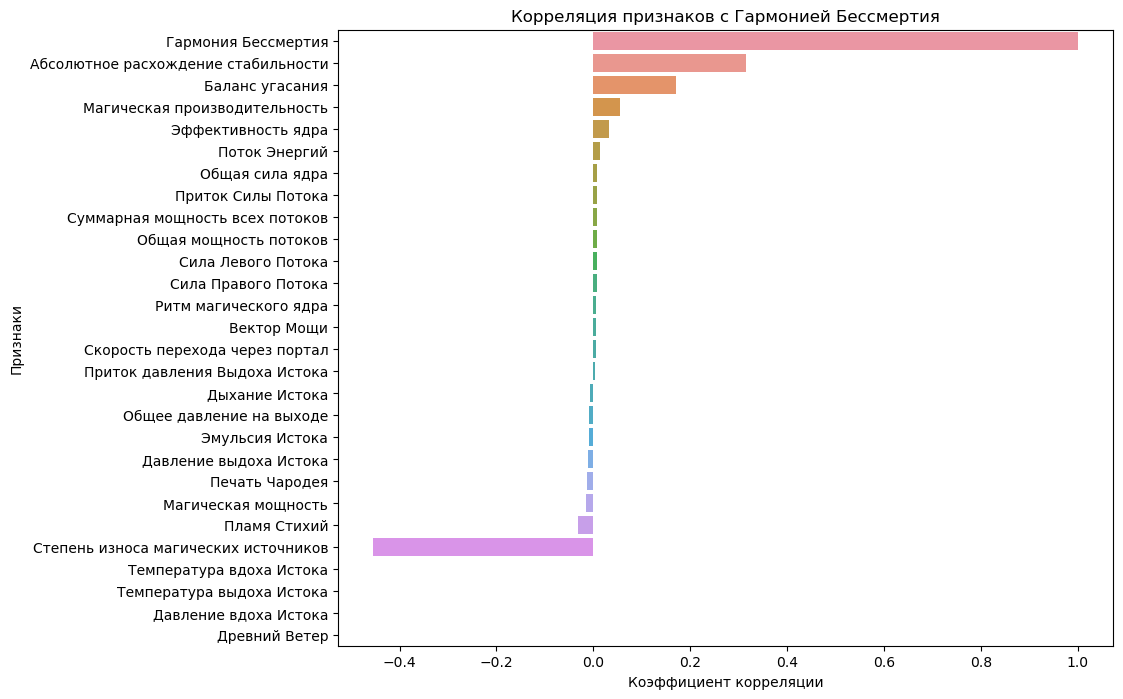

In [ ]:
# Вычисляем корреляционную матрицу для всех признаков по отношению к 'Гармония Бессмертия'
correlation_matrix = data.corr()['Гармония Бессмертия'].sort_values(ascending=False)

# Создаем график корреляции признаков с 'Гармония Бессмертия'
plt.figure(figsize=(10, 8))  # Задаем размер графика
sns.barplot(x=correlation_matrix.values, y=correlation_matrix.index)  # Строим столбчатую диаграмму
plt.title('Корреляция признаков с Гармонией Бессмертия')  # Устанавливаем заголовок графика
plt.xlabel('Коэффициент корреляции')  # Подписываем ось X
plt.ylabel('Признаки')  # Подписываем ось Y
plt.show()  # Отображаем график

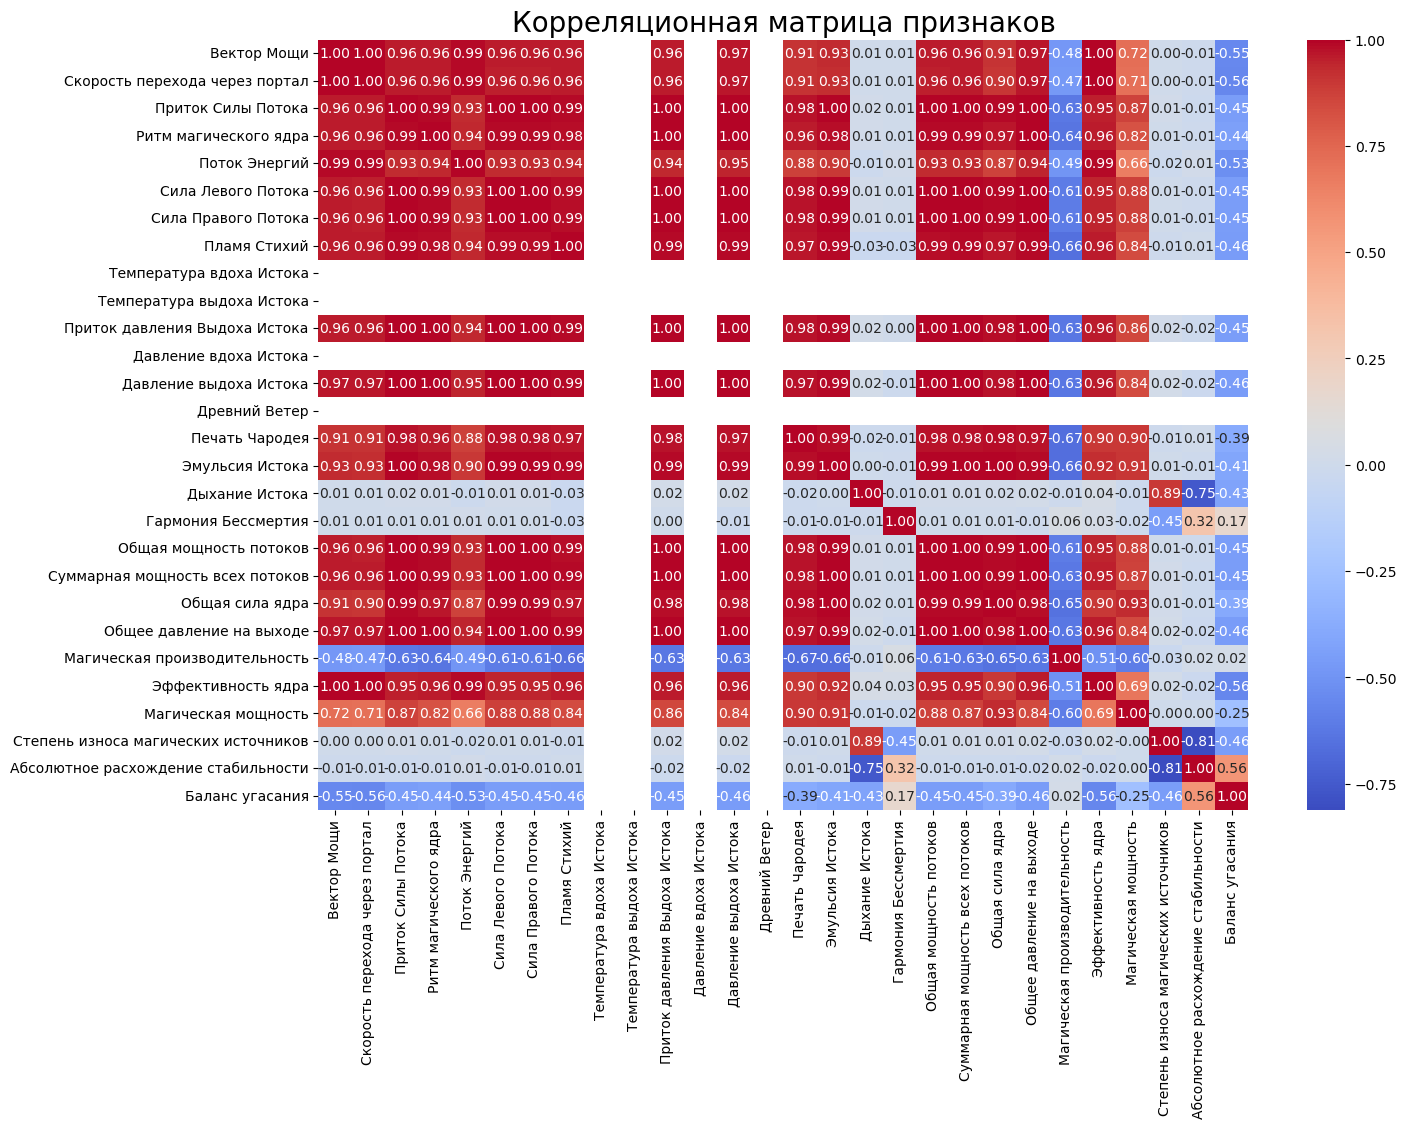

In [ ]:
# Устанавливаем размер графика
plt.figure(figsize=(15, 10))

# Вычисляем корреляционную матрицу для всех признаков
correlation_matrix = data.corr()

# Строим тепловую карту (heatmap) корреляций
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Устанавливаем заголовок графика с увеличенным шрифтом
plt.title("Корреляционная матрица признаков", fontsize=20)

# Отображаем график
plt.show()

# 5: Снижение мультиколлинеарности
Для более точного результата нужно снизить коллинеарность между признаками

In [ ]:
# Вычисляем верхний треугольник корреляционной матрицы, чтобы избежать дублирования значений
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Определяем признаки, которые нужно удалить — те, что имеют корреляцию выше 0.9, кроме 'Гармония Бессмертия'
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9) and column != 'Гармония Бессмертия']

# Удаляем признаки с высокой корреляцией
data = data.drop(columns=to_drop)

# Отображаем первые строки очищенного датасета с уменьшенной мультиколлинеарностью
data

,Вектор Мощи,Температура вдоха Истока,Температура выдоха Истока,Давление вдоха Истока,Древний Ветер,Дыхание Истока,Гармония Бессмертия,Магическая производительность,Степень износа магических источников,Абсолютное расхождение стабильности,Баланс угасания
0,1.138,736,636.963,1.394603,1.026,0.95,0.975,18.820976,0.974359,0.025,0.016199
2,3.144,736,636.963,1.394603,1.026,0.95,0.975,17.876293,0.974359,0.025,0.005400
3,4.161,736,636.963,1.394603,1.026,0.95,0.975,17.243799,0.974359,0.025,0.004050
6,7.148,736,636.963,1.394603,1.026,0.95,0.975,11.897841,0.974359,0.025,0.002314
7,8.206,736,636.963,1.394603,1.026,0.95,0.975,9.989126,0.974359,0.025,0.002025
...,...,...,...,...,...,...,...,...,...,...,...
11927,3.144,736,636.963,1.394603,1.026,1.00,1.000,20.486549,1.000000,0.000,0.000000
11928,4.161,736,636.963,1.394603,1.026,1.00,1.000,19.291500,1.000000,0.000,0.000000
11930,6.175,736,636.963,1.394603,1.026,1.00,1.000,14.312087,1.000000,0.000,0.000000
11932,8.206,736,636.963,1.394603,1.026,1.00,1.000,10.745483,1.000000,0.000,0.000000


# 6: Построение и оценка модели
Показатели для оценивания работы модели

In [ ]:
# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['Гармония Бессмертия'])
y = data['Гармония Бессмертия']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели градиентного бустинга
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_gb = gb_model.predict(X_test)

# Вычисление метрик производительности модели
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Среднеквадратичная ошибка (MSE): {mse_gb:.8f}")
print(f"Коэффициент детерминации (R²): {r2_gb:.4f}")

Среднеквадратичная ошибка (MSE): 0.00000033
Коэффициент детерминации (R²): 0.9940


# 7: Анализ важности признаков

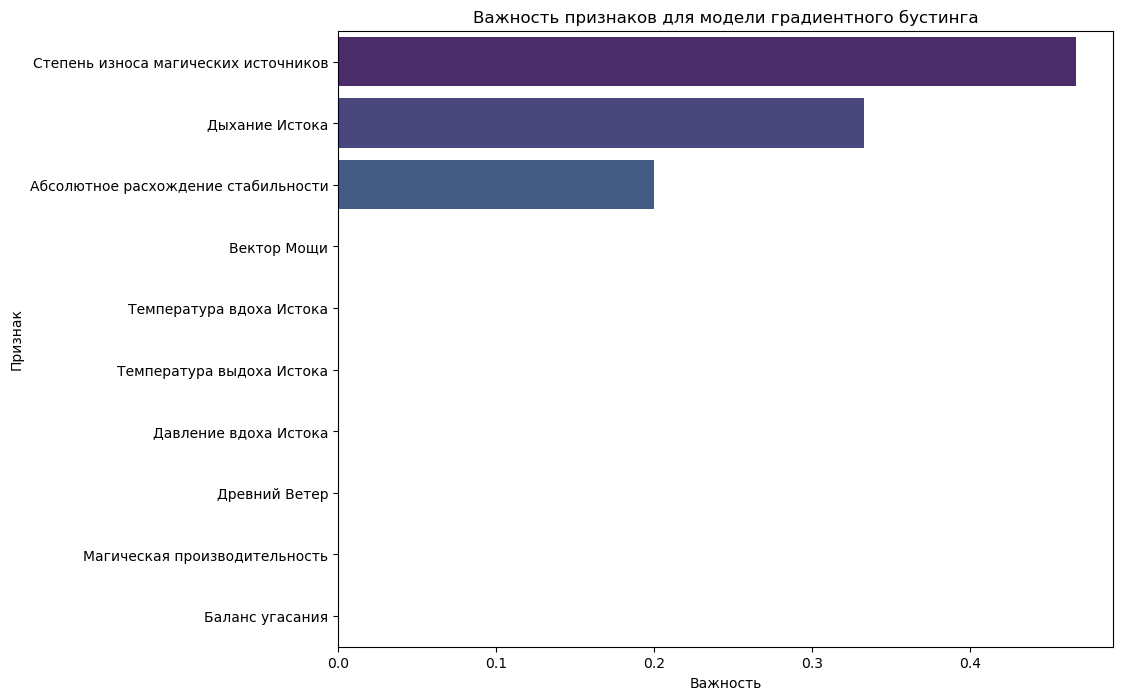

In [ ]:
# Получаем значения важности признаков из модели градиентного бустинга
feature_importances = gb_model.feature_importances_
feature_names = X.columns

# Создаем DataFrame для визуализации
importance_df = pd.DataFrame({'Признак': feature_names, 'Важность': feature_importances})
importance_df = importance_df.sort_values(by='Важность', ascending=False)

# Построение графика важности признаков
plt.figure(figsize=(10, 8))
sns.barplot(x='Важность', y='Признак', data=importance_df, palette="viridis")
plt.title("Важность признаков для модели градиентного бустинга")
plt.xlabel("Важность")
plt.ylabel("Признак")
plt.show()

# Заключение
Модель градиентного бустинга показала довольно высокую точность предсказаний с **MSE:0.00000033 и R²:0.9940**, что говорит о хорошем качестве прогноза. Наибольшее влияние на целевую переменную `Гармония Бессмертия` оказывают такие  признаки как: **Степень износа магических источников**, **Дыхание Истока** и **Абсолютное расхождение стабильности**. Модель успешно справляется с задачей, и её можно использовать для точных предсказаний.